<a href="https://colab.research.google.com/github/changsin/Win-Data-Science-Competition/blob/main/week3_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 3 Practice Quiz for Metrics.

#LogLoss

## What would be a logloss value for a binary classification task, if we use constant predictor f(x) = 0.5? 

Log Loss (or Cross Entropy) formula is:

$$-\frac{1}{N}\sum_{i=1}^N(y_i \cdot log(p(y_i)) + (1 - y_i) \cdot log(1 - p(y_i)))$$

**p(y_i):** probability of 1 \
**(1 - p(y_i)):** probability of 0 \
y_i: ground truth

Since this is a binary classification N = 1 and we can substitute y_i to 0 and 1. 

In [27]:
import numpy as np

N = 2

yis = [0, 1]
f = 0.5

def logloss(f, yis):
  sum = 0
  for yi in yis:
    sum += (yi * np.log(f)) + (1 - yi) * np.log(1 - f)
  return -sum/len(yis)

logloss(f, yis)

# logloss = (1/N) * sum(-y*log(f)-(1-y)*log(1-f))
# logloss

# logloss(y=0) = -(1-0)*log(1-f) = -log(f)
# logloss(y=1) = -1*log(f) = -log(f)
# # That is either ground true y is 0 or 1 the cost is -log(f)
# logloss = (1/N) * N * (-log(f)) = -log(f) = -log(5) = 0.69315

0.6931471805599453

## Suppose we solve a binary classification task and our solution is scores with logloss. What predictions are more preferable in terms of logloss if true labels are y_true =  [0, 0, 0, 0].

In [41]:
y_true = np.array([0, 0, 0, 0])
y_pred1 = np.array([0.4, 0.5, 0.5, 0.6])
y_pred2 = np.array([0, 0, 0, 1])
y_pred3 = np.array([0.5, 0.5, 0.5, 0.5])

def logloss(y_preds, y_gt):
  # sum = 0
  # for yp, yi in zip(y_preds, y_gt):
  #   print("{} {}".format(yp, yi))
  #   sum = sum + (yi * np.log(yp)) + (1 - yi) * np.log(1 - yp)
  # return -sum/len(yis)
  loss1 = (np.multiply(y_gt, np.log(y_preds))).sum()
  loss0 = (np.multiply((1 - y_gt), np.log(1 - y_preds))).sum()
  print(len(y_gt))
  return -(loss1 + loss0)/len(y_gt)

print(logloss(y_pred1, y_true))
print(logloss(y_pred2, y_true))
print(logloss(y_pred3, y_true))

4
0.7033526791900091
4
nan
4
0.6931471805599453


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


# AUC
## How to calculate AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

In [1]:
y_test = [1, 0, 1, 1, 1, 0, 0]
pred_prob1 = [0.39, 0.52, 0.91, 0.85, 0.49, 0.02, 0.44]

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, threshold = roc_curve(y_test, random_probs, pos_label=1)
score = roc_auc_score(y_test, pred_prob1)
score

0.75

Here is how you can plot the AUC.

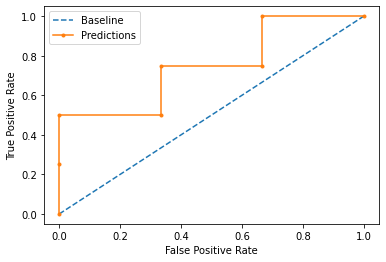

In [3]:

pyplot.plot(p_fpr, p_tpr, linestyle='--', label='Baseline')
pyplot.plot(fpr1, tpr1, marker='.', label='Predictions')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()